#💼AviaKompaniya (portfolio)

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#00b3ff;
           font-size:300%;
           font-family:Verdana;   
           letter-spacing:0.5px">

<p style="font-size:30px;text-align:left">Yo`lovchilarning parvozdan qoniqish darajasini bashorat qilish🎯</p>
</div>

<p style="text-align:center;"><img src="https://image.cnbcfm.com/api/v1/image/106918717-1627558728211-gettyimages-1233035475-778823_NA-0521-AIRTRAVEL_KKN_10920JPG.jpeg?v=1627558770&w=740&h=416" width="500" height="350">

Yo'lovchi doim aviakompaniya uchun eng yaxshi mijozlar guruhidir, chunki ular kompaniyaning asosiy daromadlaridan biridir.
    
Ularning fikr-mulohazalarini tahlil qilish aviakompaniyalarga yo'lovchiga aynan nima kerakligini tushunishga yordam beradi. Shu bilan Aviakompaniya qaysi jihatlarni yaxshilash kerakligini bilib olish mumkin.
    
Eng muhimi, yo'lovchilarning qoniqishini bashorat qilish ham aviakompaniyalarda CRMga yordam beradi...
    
Reja:

* Yo'lovchilarni qoniqishi va boshqa barcha xususiyatlar o'rtasida bog`liqlikni aniqlash.

* Yo'lovchilar qoniqishini bashorat qilish uchun eng yaxshi `bashorat modellar`ni tanlash

* ajoyib ishlash modellari orqali yuqori korrelyatsiya omillarini baholash.

Kerakli Kutubxonalarni chaqiramiz:

In [ ]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
import warnings

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,plot_roc_curve, roc_curve, precision_score, recall_score, f1_score, accuracy_score, jaccard_score, classification_report

warnings.filterwarnings("ignore")


##Train dataset:

In [ ]:
# train data
df_train = pd.read_csv('/content/train_dataset.csv', index_col=0)
# test data
df_test = pd.read_csv('/content/test_dataset.csv', index_col=0)
# sample_submission data
ss_df = pd.read_csv('/content/sample_submission.csv', index_col=0)

Quyidagi datasetda yo`lovchilarning ma'lum bir xizmatlardan qoniqish darajasi keltirilgan. Bizning vazifamiz ushbu ma'lumotlardan foydalangan holda ularning parvozdan qoniqish darajasini aniqlash (bashorat qilish).

### Tarkib:

`Gender`: yo'lovchilarning jinsi (ayol, erkak)

`Customer Type`: mijoz turi (sodiq mijoz, ishonchsiz mijoz)

`Age`: yo'lovchilarning haqiqiy yoshi

`Type of Travel`: yo'lovchilar parvozining maqsadi (shaxsiy sayohat, biznes sayohat)

`Class`: yo'lovchilar samolyotida sayohat klassi (Business, Eco, Eco Plus)

`Flight distance`: Ushbu sayohatning parvoz masofasi

`Inflight wifi service`: Parvoz ichidagi Wi-Fi xizmatidan qoniqish darajasi (0: Tegishli emas; 1-5)

`Departure/Arrival time convenient`: Ketish/Kelish vaqtining qoniqish darajasi

`Ease of Online booking`: Onlayn bron qilishdan qoniqish darajasi

`Gate location`: Darvoza joylashuvidan qoniqish darajasi

`Food and drink`: Oziq-ovqat va ichimlikdan qoniqish darajasi

`Online boarding`: Onlayn bortdan qoniqish darajasi

`Seat comfort`: O'rindiqning qulayligidan qoniqish darajasi

`Inflight entertainment`: Parvoz ichidagi o'yin-kulgidan qoniqish darajasi

`On-board service`: Bort xizmatidan qoniqish darajasi

`Leg room service`: oyoq xonasi xizmatidan qoniqish darajasi

`Baggage handling`: bagajni tashishdan qoniqish darajasi

`Check-in service`: Ro'yxatdan o'tish xizmatidan qoniqish darajasi

`Inflight service`: Parvoz ichidagi xizmatdan qoniqish darajasi

`Cleanliness`: Tozalikdan qoniqish darajasi

`Arrival Delay in Minutes`: kechikish

## Ma`lumotlarni o'rganamiz

`df_train` haqida:

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  object 
 1   Customer Type                      10000 non-null  object 
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  object 
 4   Class                              10000 non-null  object 
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

Matnli ustunlar tarkibi:

In [ ]:
# matnli va raqamli ustunlarni ajratib olamiz:

# num columns:
numerical_columns = [k for k in df_train.columns if df_train[k].dtype.name != 'object']
numerical_columns.remove('satisfaction')

# obj columns:
categorical_columns = [k for k in df_train.columns if df_train[k].dtype.name == 'object']
df_train_describe = df_train.describe(include = 'object')

In [ ]:
df_train.describe(include = 'object')

,Gender,Customer Type,Type of Travel,Class
count,10000,10000,10000,10000
unique,2,2,2,3
top,Female,Loyal Customer,Business travel,Business
freq,5169,8307,7079,5048


In [ ]:
binary_columns = [k for k in categorical_columns if df_train_describe[k]['unique'] == 2] #ikkita cat dan iborat
nonbinary_columns = [k for k in categorical_columns if df_train_describe[k]['unique'] > 2] # ikkidan katta
print(binary_columns, nonbinary_columns)

['Gender', 'Customer Type', 'Type of Travel'] ['Class']


### Keling, har bir ikkilik Columnlar uchun takrorlanmas qiymatlarni ko'rib chiqaylik:

In [ ]:
for col in binary_columns:
    print(col, ': ', end = '')
    for uniq in df_train[col].unique():
        if uniq == df_train[col].unique()[-1]:
            print(uniq, end = '.')
        else:
            print(uniq, end = ', ')
    print()

Gender : Male, Female.
Customer Type : disloyal Customer, Loyal Customer.
Type of Travel : Business travel, Personal Travel.


Ularning sonini ko`ramiz:

In [ ]:
for col in binary_columns:
    k = 0
    for uniq in df_train[col].unique():
        df_train.at[df_train[col] == uniq, col] = k
        k +=1 
for col in binary_columns:
    print(df_train[col].describe(), end = '\n\n')

count     10000
unique        2
top           1
freq       5169
Name: Gender, dtype: int64

count     10000
unique        2
top           1
freq       8307
Name: Customer Type, dtype: int64

count     10000
unique        2
top           0
freq       7079
Name: Type of Travel, dtype: int64



### Matnli ustunlarni raqamliga o'zgartiramiz.

Buning uchun yoki `sklearn` tarkibidagi `LabelEncoder` va `replace` dan  foydalanish mumkin. 

`.replace`

In [ ]:
Gender = {'Female': 0, 'Male':1}
travelType = {'Business travel':1,'Personal Travel':0}
Class = {'Business':2,'Eco Plus': 1,'Eco':0}
CustType = {'Loyal Customer':1,'disloyal Customer':0}

# train data uchun:
df_train['Gender'].replace(Gender, inplace=True)
df_train['Type of Travel'].replace(travelType, inplace=True)
df_train['Customer Type'].replace(CustType, inplace=True)
df_train['Class'].replace(Class, inplace=True)

# test data uchun
df_test['Gender'].replace(Gender, inplace=True)
df_test['Type of Travel'].replace(travelType, inplace=True)
df_test['Customer Type'].replace(CustType, inplace=True)
df_test['Class'].replace(Class, inplace=True)


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  int64  
 1   Customer Type                      10000 non-null  int64  
 2   Age                                10000 non-null  int64  
 3   Type of Travel                     10000 non-null  int64  
 4   Class                              10000 non-null  int64  
 5   Flight Distance                    10000 non-null  int64  
 6   Inflight wifi service              10000 non-null  int64  
 7   Departure/Arrival time convenient  10000 non-null  int64  
 8   Ease of Online booking             10000 non-null  int64  
 9   Gate location                      10000 non-null  int64  
 10  Food and drink                     10000 non-null  int64  
 11  Online boarding                    10000 non-null  int

## Korrelyatsiya(foizda):

In [ ]:
df_train.corrwith(df_train['satisfaction']).abs().sort_values(ascending=False)*100

satisfaction                         100.000000
Class                                 51.893105
Online boarding                       50.498562
Type of Travel                        48.226628
Inflight entertainment                40.089954
Seat comfort                          34.229377
On-board service                      32.642642
Leg room service                      32.436790
Cleanliness                           31.033803
Flight Distance                       29.870298
Inflight wifi service                 27.739521
Baggage handling                      24.796452
Inflight service                      24.058363
Checkin service                       23.235876
Food and drink                        20.785353
Customer Type                         18.159192
Ease of Online booking                16.466159
Age                                   14.430214
Departure/Arrival time convenient      6.763835
Arrival Delay in Minutes               4.864993
Departure Delay in Minutes             4

In [ ]:
corr_matrix = df_train.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,0.025020,0.004407,0.021504,0.001256,0.017786,0.010111,0.016445,0.007580,0.017967,0.004991,0.045786,0.045933,0.009528,0.004277,0.019076,0.039071,0.019710,0.048099,0.008535,0.032548,0.027431,0.002601
Customer Type,0.025020,1.000000,0.291192,0.280023,0.123456,0.226549,0.003499,0.196112,0.018328,0.000866,0.072036,0.195554,0.174279,0.126166,0.061039,0.071066,0.014837,0.032102,0.026231,0.101625,0.008944,0.006917,0.181592
Age,0.004407,0.291192,1.000000,0.075133,0.163603,0.110823,0.020904,0.036071,0.026964,0.012077,0.021971,0.215613,0.169291,0.097421,0.073412,0.060124,0.040368,0.038761,0.036921,0.062409,0.015618,0.019086,0.144302
Type of Travel,0.021504,0.280023,0.075133,1.000000,0.557850,0.276756,0.099728,0.243037,0.114107,0.035903,0.077951,0.241535,0.150680,0.186244,0.080640,0.153127,0.035709,0.006062,0.038847,0.110651,0.007013,0.007061,0.482266
Class,0.001256,0.123456,0.163603,0.557850,1.000000,0.453539,0.025290,0.091019,0.089416,0.007877,0.095619,0.336912,0.245338,0.226036,0.224167,0.221653,0.179048,0.165677,0.158066,0.153413,0.001794,0.005113,0.518931
Flight Distance,0.017786,0.226549,0.110823,0.276756,0.453539,1.000000,0.002341,0.021320,0.052807,0.017513,0.065939,0.213859,0.170203,0.150573,0.115167,0.140509,0.073161,0.066881,0.058939,0.100705,0.011425,0.002901,0.298703
Inflight wifi service,0.010111,0.003499,0.020904,0.099728,0.025290,0.002341,1.000000,0.362355,0.730731,0.362702,0.119807,0.438034,0.107020,0.198351,0.133511,0.172526,0.123695,0.039923,0.113467,0.119484,0.019843,0.023086,0.277395
Departure/Arrival time convenient,0.016445,0.196112,0.036071,0.243037,0.091019,0.021320,0.362355,1.000000,0.456498,0.479002,0.001982,0.046456,0.002102,0.007094,0.071368,0.027487,0.072969,0.078166,0.062814,0.001172,0.010846,0.008985,0.067638
Ease of Online booking,0.007580,0.018328,0.026964,0.114107,0.089416,0.052807,0.730731,0.456498,1.000000,0.476405,0.017193,0.388220,0.016831,0.043574,0.053613,0.116333,0.044259,0.013875,0.032168,0.007301,0.001474,0.003715,0.164662
Gate location,0.017967,0.000866,0.012077,0.035903,0.007877,0.017513,0.362702,0.479002,0.476405,1.000000,0.002645,0.003610,0.008359,0.001144,0.015083,0.008752,0.000493,0.037372,0.003065,0.015090,0.001907,0.000684,0.007169


# Vizualizatsiya📈

In [ ]:
numerics = ['int64','float64']

train_con_col = df_train.select_dtypes(include = numerics).columns # df_trainni ichidan agar dtype= numerics ga bolsa, shu ustunlarning nomlarini train_con_col ga saqla
train_cat_col = df_train.select_dtypes(include = "object").columns # vahokazo....
test_con_col = df_test.select_dtypes(include = numerics).columns
test_cat_col = df_test.select_dtypes(include = "object").columns

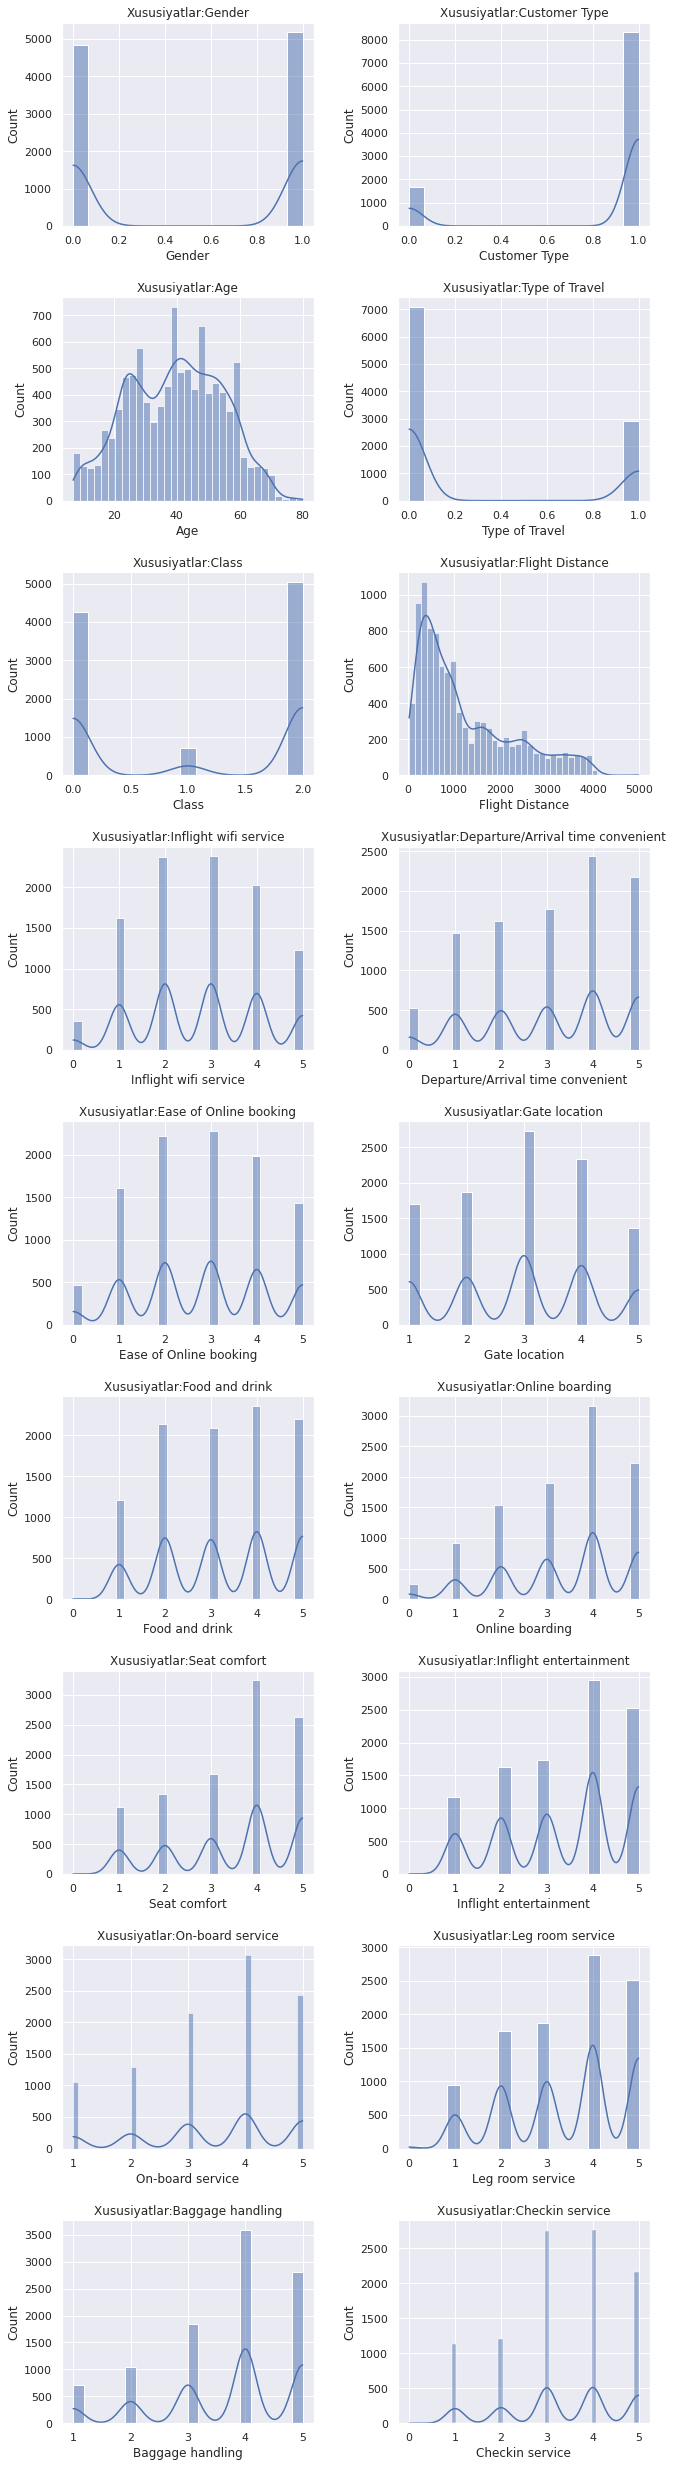

In [140]:
fig, axs = plt.subplots(9, 2, figsize=(10, 35)) 
fig.tight_layout(pad=4.0) # yozuvlarni tugri joylashuvi uchun

for f,ax in zip(train_con_col,axs.ravel()):
    sns.set(font_scale = 1)
    ax=sns.histplot(ax=ax,data=df_train,x=df_train[f], kde=True)
    ax.set_title('Xususiyatlar:'+ f)

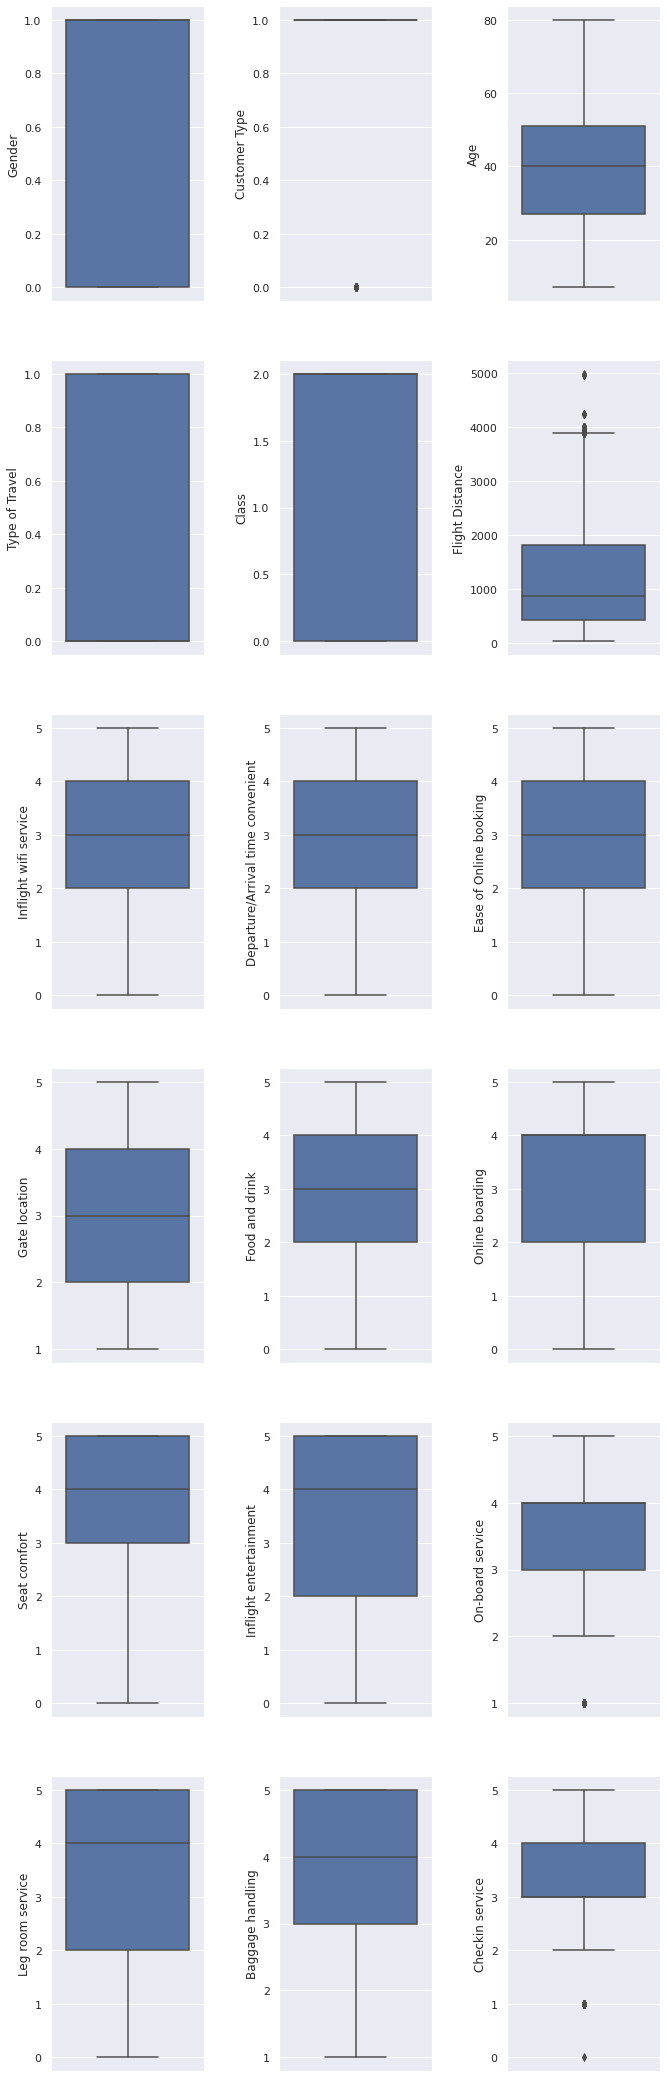

In [ ]:
fig, axs = plt.subplots(6, 3, figsize=(10,30))
fig.tight_layout(pad=3.0)

for f,ax in zip(train_con_col,axs.ravel()):
    sns.set(font_scale = 2)
    ax=sns.boxplot(ax=ax,data=df_train,y=df_train[f])

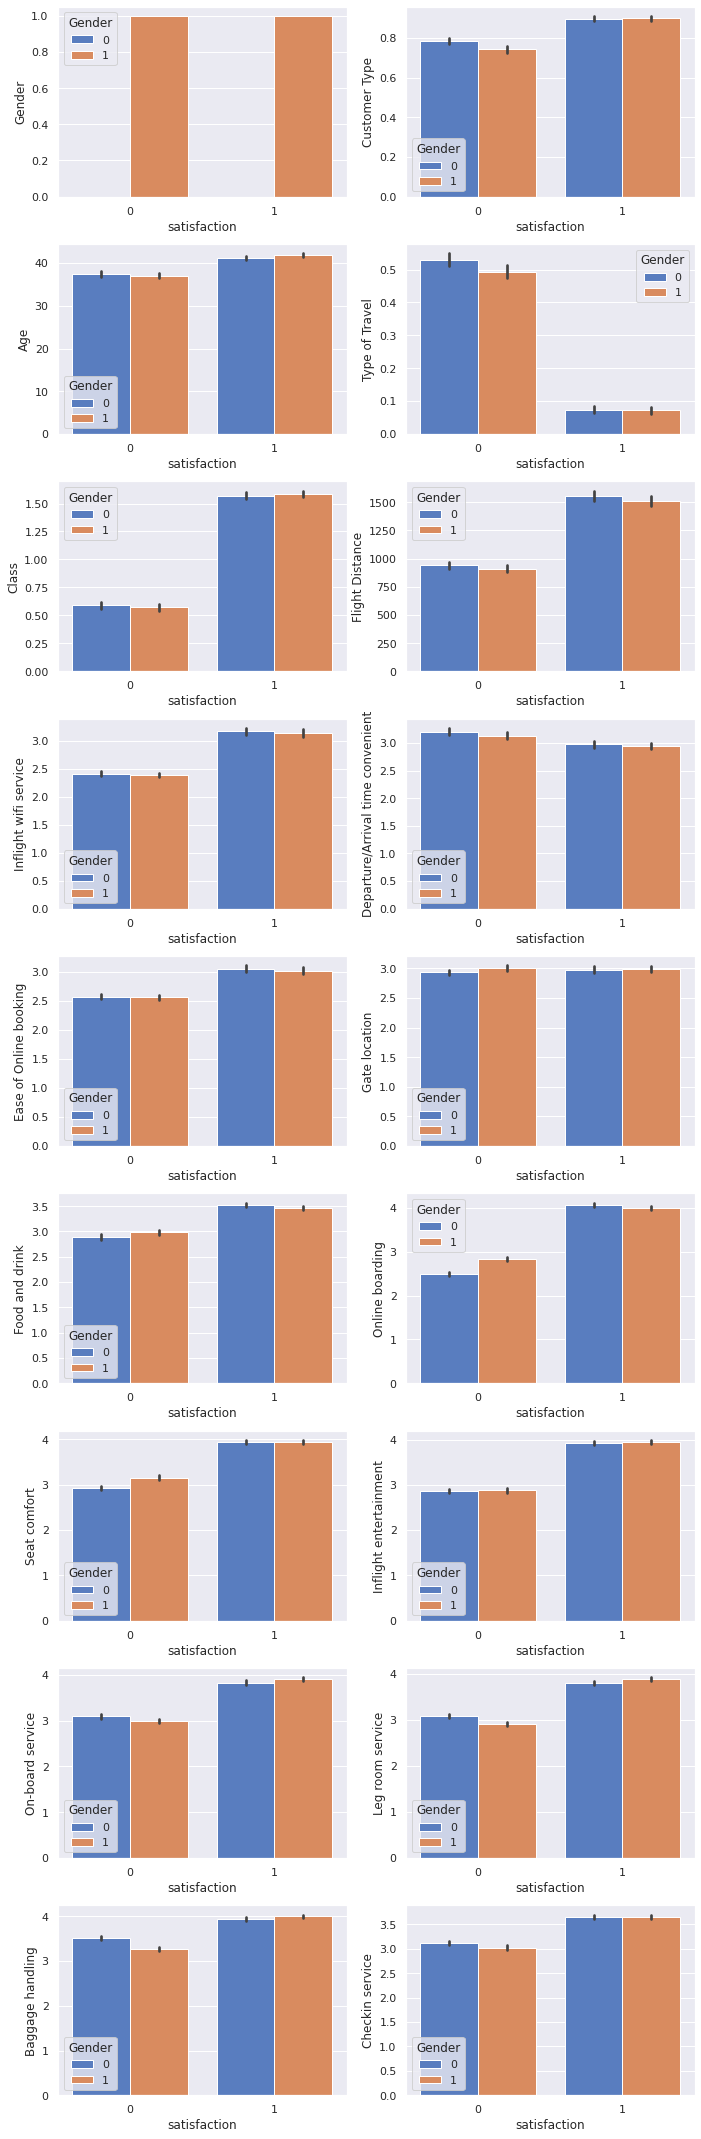

In [133]:
def detail_barplot(category):
    fig, axs = plt.subplots(9, 2, figsize=(10,30))
    sns.set(font_scale=1)
    fig.tight_layout(pad=2.0)
    for feature,ax in zip(train_con_col,axs.ravel()):
        ax = sns.barplot(ax=ax,x="satisfaction", y=feature, hue=category,palette= 'muted', data=df_train)

detail_barplot("Gender")

Gender bo'yicha natijalarga asoslanib:

-uzoq parvoz masofasi ularni sayohatni qondirish ehtimolini oshiradi.

-Ammo o'rtacha kechikish vaqti, vaqt 12,5 daqiqadan yuqori bo'lsa, ular qoniqtirmasligi mumkin.

-Erkak va ayol o'rtasida sezilarli farqlar yo'q.

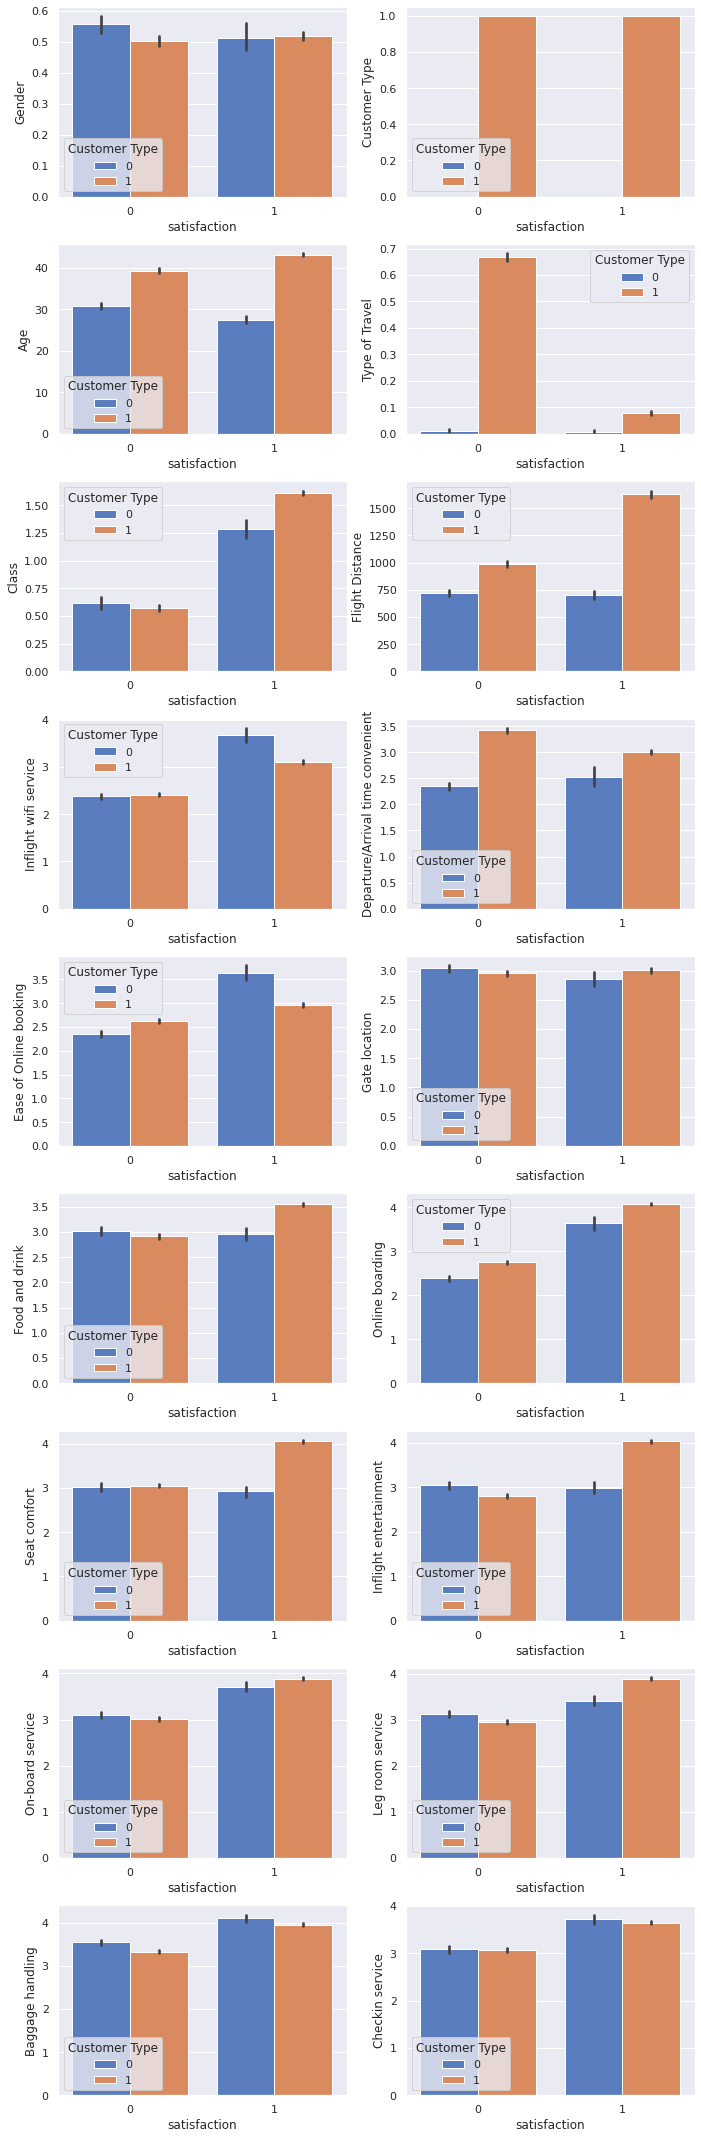

In [134]:
detail_barplot("Customer Type")

###Sodiq mijoz uchun:
Yoshi 40 atrofida
 -Yuqori parvoz masofasidan,O'rindiqning qulayligi, parvozdagi o'yin-kulgi, tozalikdan mamnun.

### Ishonchsiz mijoz uchun:
Yoshi 30 atrofida: Wi-Fi xizmatidan, onlayn bron qilish qulayligidan mamnun.
Shunga qaramay, kechikish vaqti daqiqalari 12,5 yoki undan yuqori bo'lsa, ular odatda neytral yoki norozilikni his qilishadi.

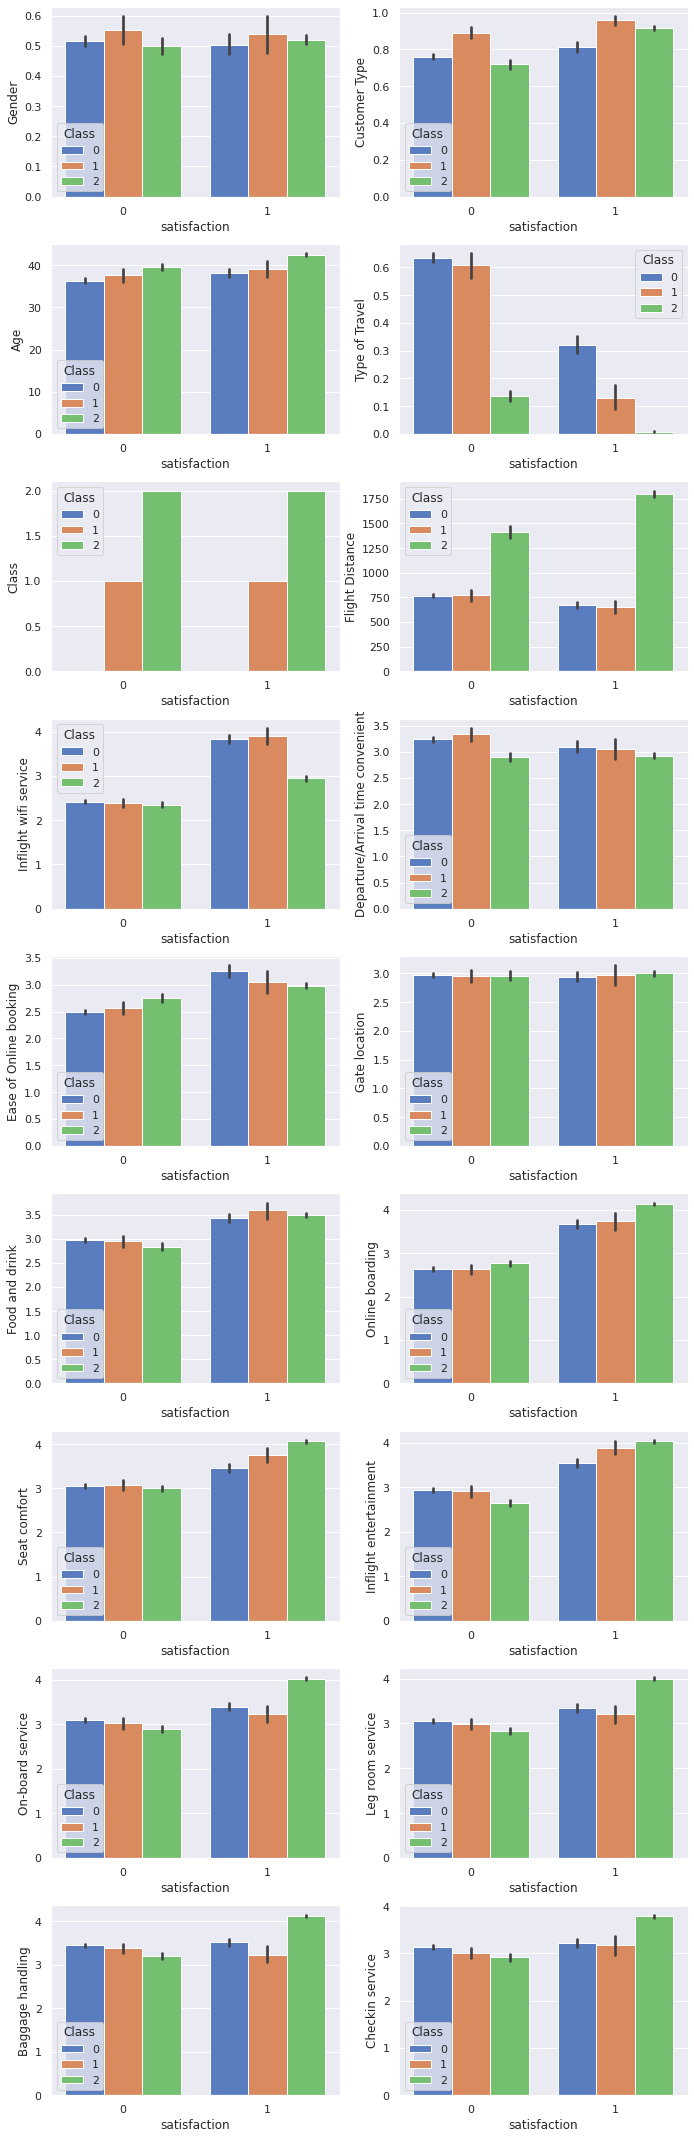

In [137]:
detail_barplot("Class")

# Machine Learningga tayorlash:

##`StratifiedShuffleSplit` :

### train va test setga ajratish:

In [135]:
from sklearn.model_selection import StratifiedShuffleSplit
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# stratified_split.split funksiyasi indekslar qaytaradi
for train_index, test_index in stratified_split.split(df_train,df_train['Gender']):
    # print(train_index)
    df_train_trainset = df_train.iloc[train_index]
    df_train_testset= df_train.iloc[test_index]

## Ma'lumotlarni tozalash va qayta ishlash

Ma'lumotlarni qayta ishlash(ML ga tayyorlash) uchun KNN dan foydalanamiz

In [ ]:
imputer = KNNImputer(n_neighbors=10, weights="uniform") # KNNImputer dan meros olamiz

# x_train
x_train = df_train_trainset.iloc[:,:-1]
x_train = imputer.fit_transform(x_train)
y_train = df_train_trainset.iloc[:,-1].to_numpy()

# x_test
x_test = df_train_testset.iloc[:,:-1]
x_test = imputer.fit_transform(x_test)
y_test = df_train_testset.iloc[:,-1].to_numpy()

# MinMaxScaler normalizatsiya qilish
x_scaler = MinMaxScaler() # normalizatsiya qilish
x_train = x_scaler.fit_transform(x_train)
x_test = x_scaler.fit_transform(x_test)

# 💠Modellarni o`qitamiz:

In [ ]:
# Har bir classdan meros olib chiqamiz:
 
rf_clf = RandomForestClassifier() 
lda_clf = LinearDiscriminantAnalysis()
svm_clf = SVC()
logisreg_clf = LogisticRegression()
GB_clf = GradientBoostingClassifier()
XGB_clf = XGBClassifier()
GNB_clf = GaussianNB()
DT_clf = DecisionTreeClassifier()

# har bir modelni clf_list(classifierList)ga joylaymiz:
clf_list = [rf_clf,lda_clf,svm_clf,logisreg_clf,GB_clf,XGB_clf,GNB_clf, DT_clf]
clf_name_list = ['Random_Forest','LDA','SupportVectorMachine','LogisticRegression','GradientBoosting','XGBoost','GaussianNaiveBayes','DecisionTreeClassifier']

# Modellarni uqitamiz:
for clf in clf_list:
    clf.fit(x_train,y_train)

## Natijalarni ko`rsatish:

In [ ]:
train_acc_list = [] # train set uchun xatoliklar ro`yxati
test_acc_list = [] # test set uchun xatoliklar ro`yxati

for clf, name in zip(clf_list, clf_name_list): # ikki royxat uchun for sikli qollanishi: =>> zip funksiyasi
    
    y_pred_train = clf.predict(x_train)
    y_pred_test = clf.predict(x_test)
    
    print('***************************************************************************')
    print(name,': \n')

    print('Training natijalari:')
    print(classification_report(y_train, y_pred_train,
                                    target_names=['Neytral yoki norozilik', 'satisfaction']))
    print('Testing natijalari:')
    print(classification_report(y_test, y_pred_test,
                                    target_names=['Neytral yoki norozilik', 'satisfaction']))
        
    train_acc_list.append(accuracy_score(y_train, y_pred_train))
    test_acc_list.append(accuracy_score(y_test, y_pred_test))

***************************************************************************
Random_Forest : 

Training natijalari:
                        precision    recall  f1-score   support

Neytral yoki norozilik       1.00      1.00      1.00      3978
          satisfaction       1.00      1.00      1.00      4022

              accuracy                           1.00      8000
             macro avg       1.00      1.00      1.00      8000
          weighted avg       1.00      1.00      1.00      8000

Testing natijalari:
                        precision    recall  f1-score   support

Neytral yoki norozilik       0.92      0.96      0.94      1022
          satisfaction       0.96      0.91      0.94       978

              accuracy                           0.94      2000
             macro avg       0.94      0.94      0.94      2000
          weighted avg       0.94      0.94      0.94      2000

***************************************************************************
LDA : 

Trainin

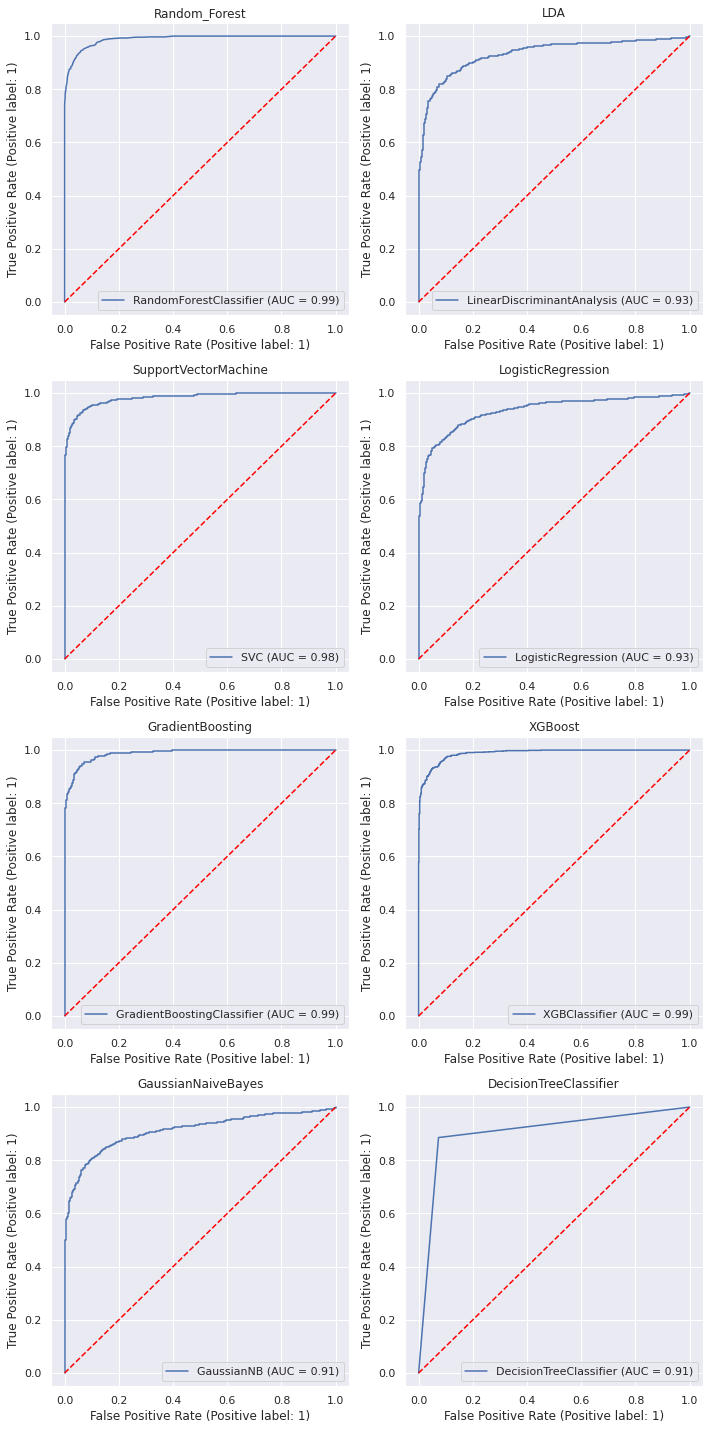

In [ ]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10,20))
line = np.linspace(0,1)


sns.set(font_scale=1.0)
for clf, ax,name in zip(clf_list, axes.flatten(),clf_name_list):
    plot_roc_curve(clf, x_test, y_test, ax=ax) 
    ax.plot(line,line, color='red', linestyle='dashed')
    ax.title.set_text(name)
fig.tight_layout(pad=1.0)
plt.show()

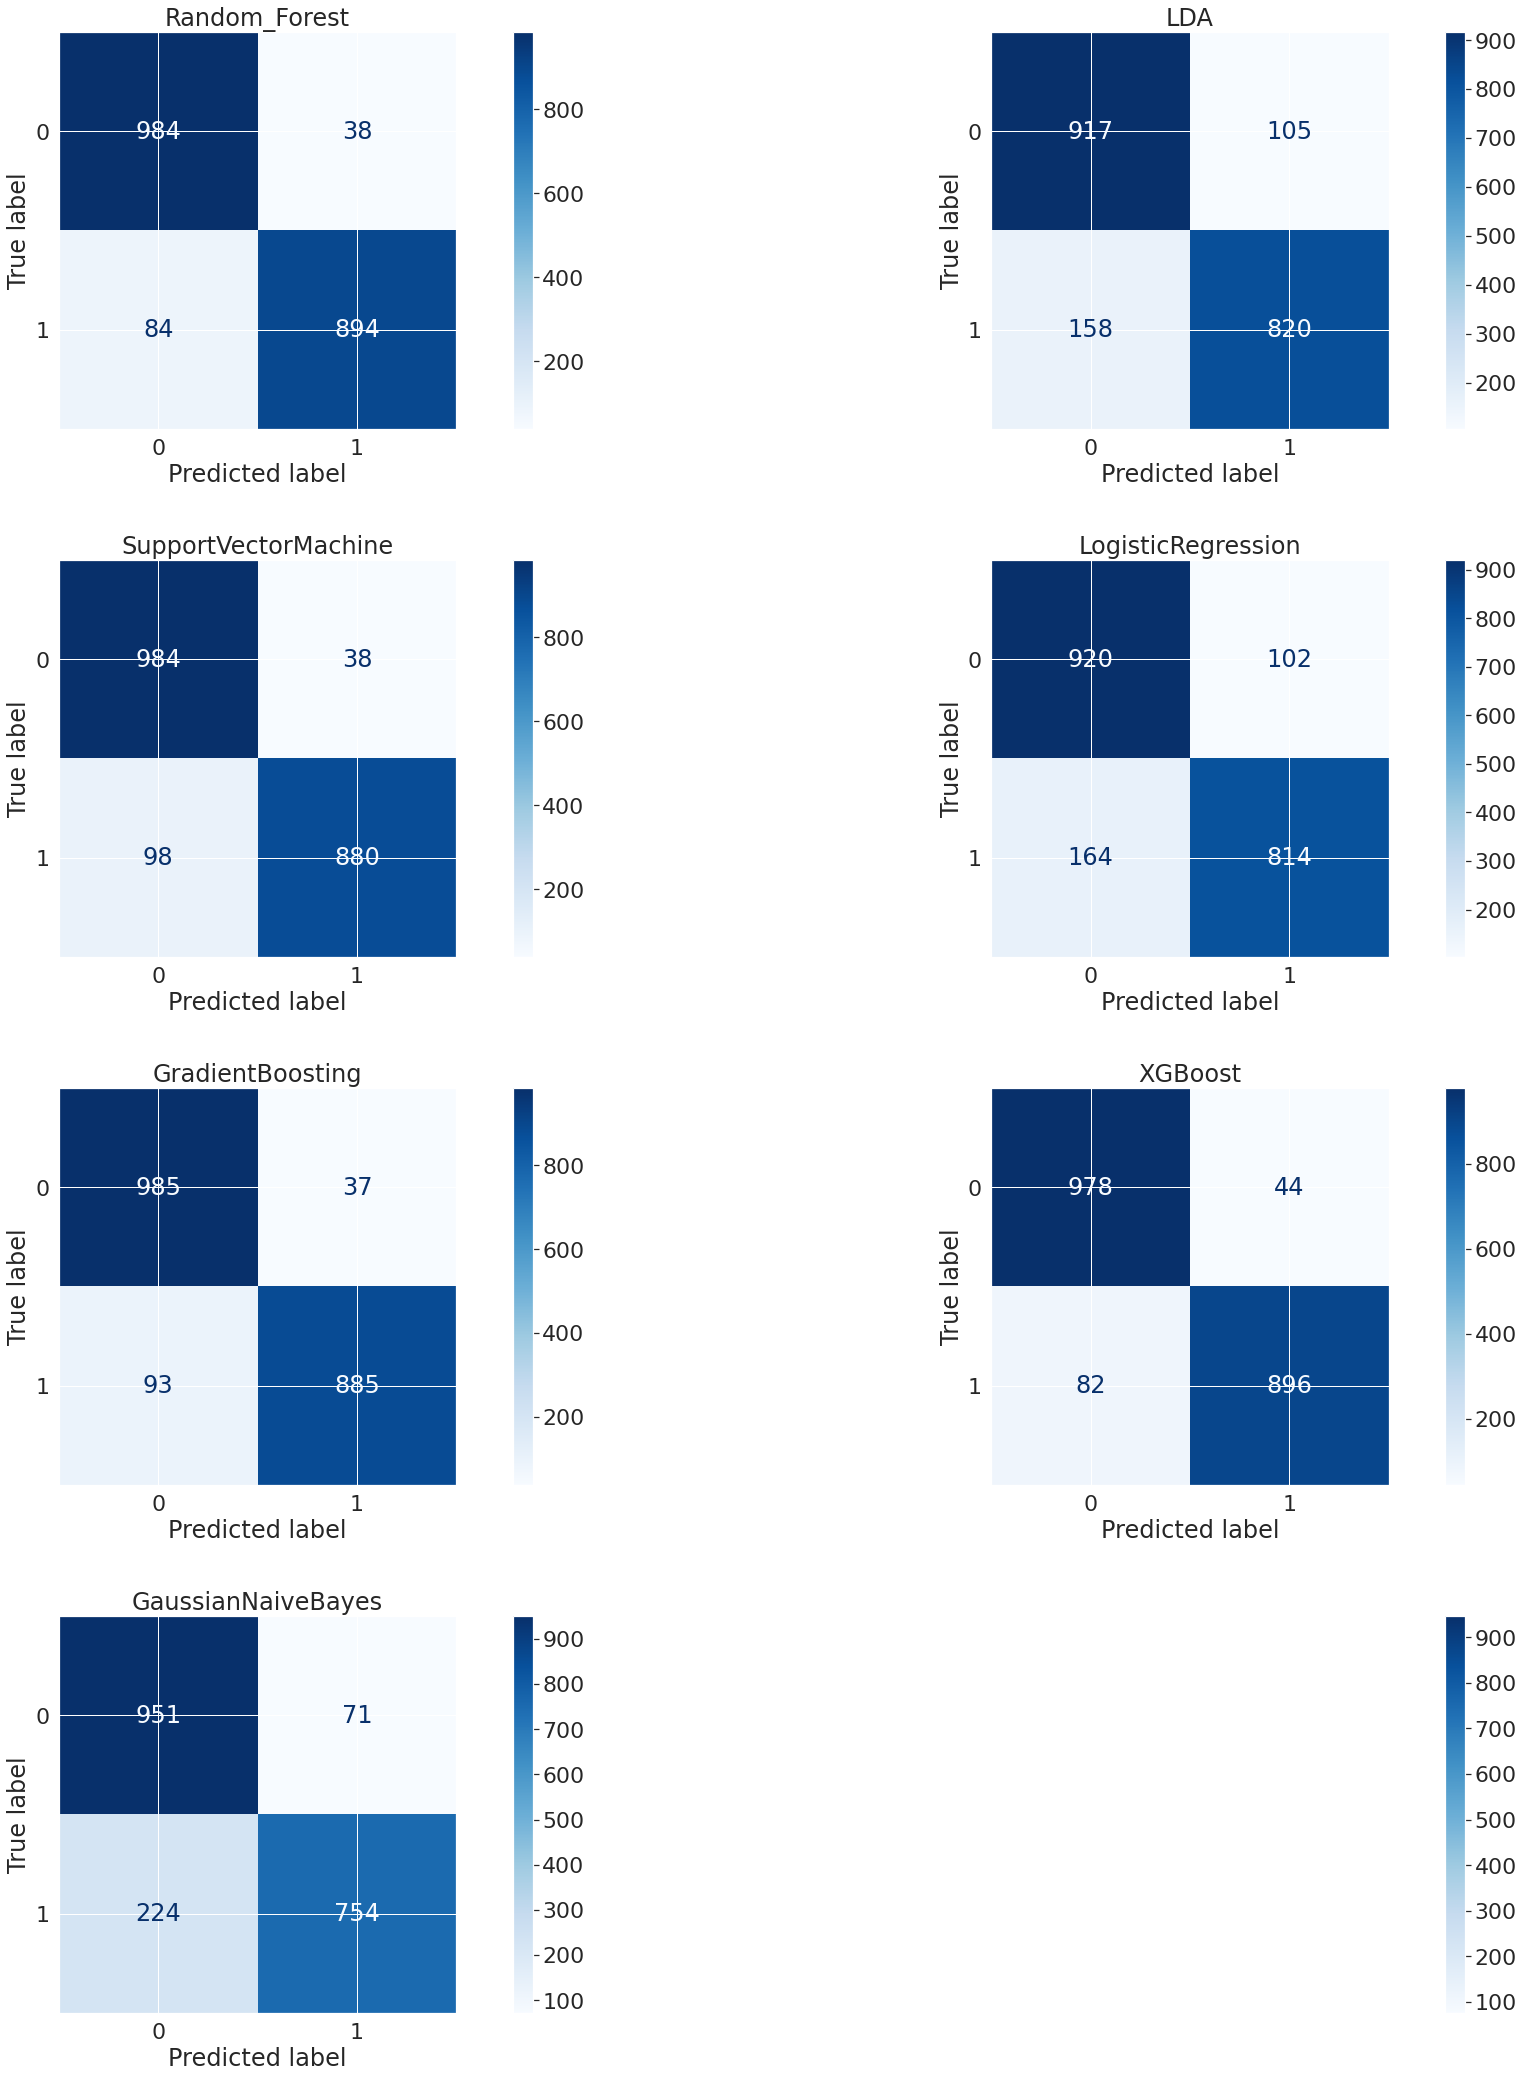

In [176]:
from sklearn.metrics import plot_confusion_matrix

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(30,30))

sns.set(font_scale=2)

for clf, ax,name in zip(clf_list, axes.flatten(),clf_name_list):
    # y_predict = clf.predict(x_test)
    plot_confusion_matrix(clf, x_test, y_test, ax=ax, cmap='Blues',
                          display_labels=['0', '1'])
    # ax = sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt ='g')
    ax.title.set_text(name)
    plt.grid(False)
fig.tight_layout(pad=2)
fig.delaxes(axes[3][1])
plt.show()

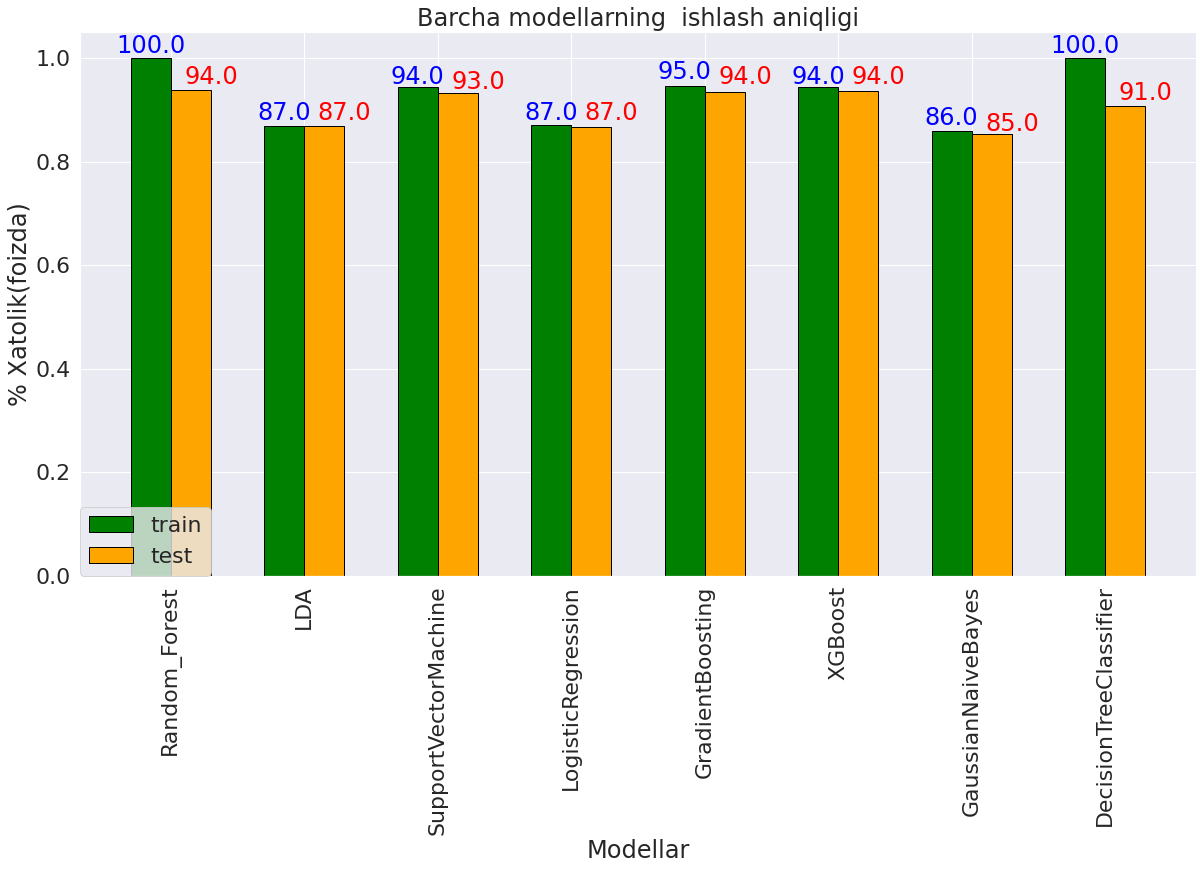

In [195]:
plt.figure(figsize=(20,10))

n = np.arange(8)
width = 0.3

plt.bar(n, train_acc_list, color = 'green',
        width = width, edgecolor = 'black',
        label='train')
for i in range(len(train_acc_list)):
        plt.text(i,train_acc_list[i].round(2)+0.01,train_acc_list[i].round(2)*100,
                 ha = 'center',color = 'blue')

plt.bar(n + width, test_acc_list, color = 'orange',
        width = width, edgecolor = 'black',
        label='test')

for i in range(len(test_acc_list)):
        plt.text(i+0.25,test_acc_list[i].round(2)+0.01,test_acc_list[i].round(2)*100,color = 'red')

plt.xlabel("Modellar")
plt.ylabel("% Xatolik(foizda)")
plt.title("Barcha modellarning  ishlash aniqligi")
  
plt.xticks(n + width/2,clf_name_list,rotation=90)
plt.legend(loc =(0,0))
  
plt.show()

Ajoyib🙌🙌, eng yuqori sinov aniqligi 94% ga yetishi mumkin.



Bu qiymat bilan `satisfaction` ustuni bilan qaysi qiymatlar koproq bog`liqligini tekshiramiz:

In [199]:
clf_list[0].feature_importances_

array([0.00560439, 0.03223183, 0.03753419, 0.10016073, 0.09958537,
       0.04208074, 0.12414769, 0.02289285, 0.04296   , 0.01538709,
       0.01427728, 0.17844723, 0.03891464, 0.04899507, 0.0301527 ,
       0.04167009, 0.02563223, 0.02363905, 0.02159582, 0.02432836,
       0.01350889, 0.01625378])

## Random Forest

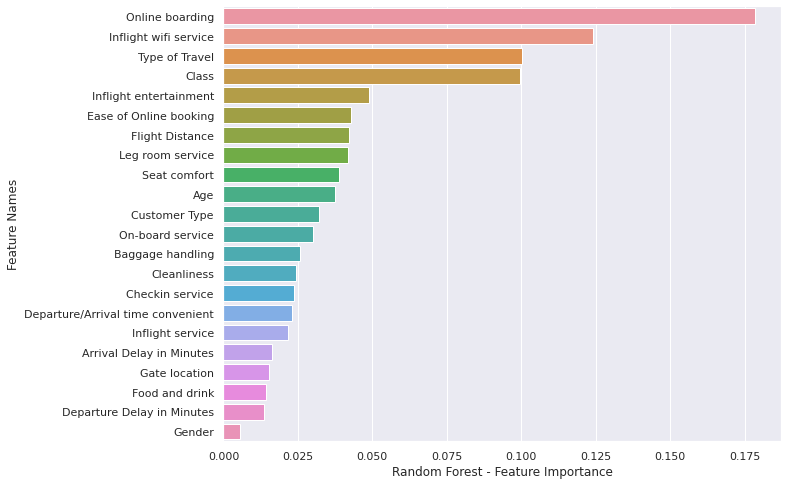

In [200]:
feature_importance = clf_list[0].feature_importances_ # random forest
col_name = df_train.iloc[:,:-1].columns
rf_fi ={'feature_names':col_name,'feature_importance':feature_importance} # lug`at

df_plt = pd.DataFrame(rf_fi) # data frame yaratdik
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)

sns.set(font_scale=1)
plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
#plt.style.use("ggplot")
plt.xlabel('Random Forest - Feature Importance')
plt.ylabel('Feature Names')
plt.show()

In [201]:
clf_list

[RandomForestClassifier(),
 LinearDiscriminantAnalysis(),
 SVC(),
 LogisticRegression(),
 GradientBoostingClassifier(),
 XGBClassifier(),
 GaussianNB(),
 DecisionTreeClassifier()]

## XGBClassifier

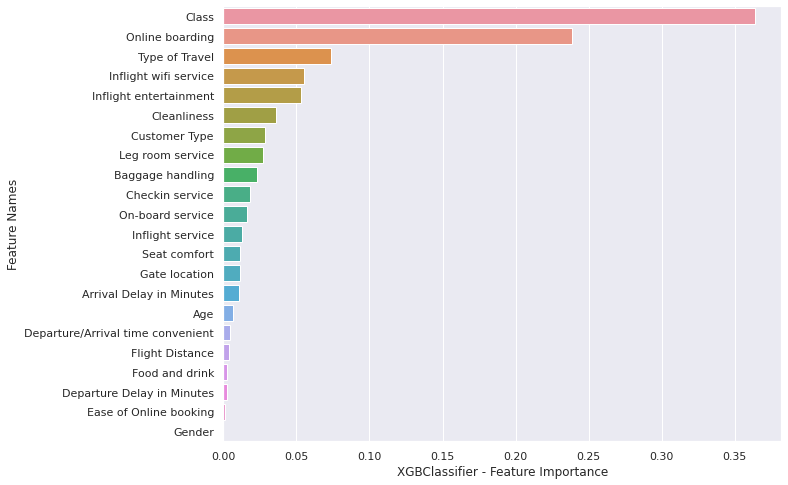

In [202]:
feature_importance = clf_list[-3].feature_importances_
col_name = df_train.iloc[:,:-1].columns
xgbs_fi ={'feature_names':col_name,'feature_importance':feature_importance}

df_plt = pd.DataFrame(xgbs_fi)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.style.use("ggplot")
plt.xlabel('XGBClassifier - Feature Importance')
plt.ylabel('Feature Names')
plt.show()

## GradientBoostingClassifier

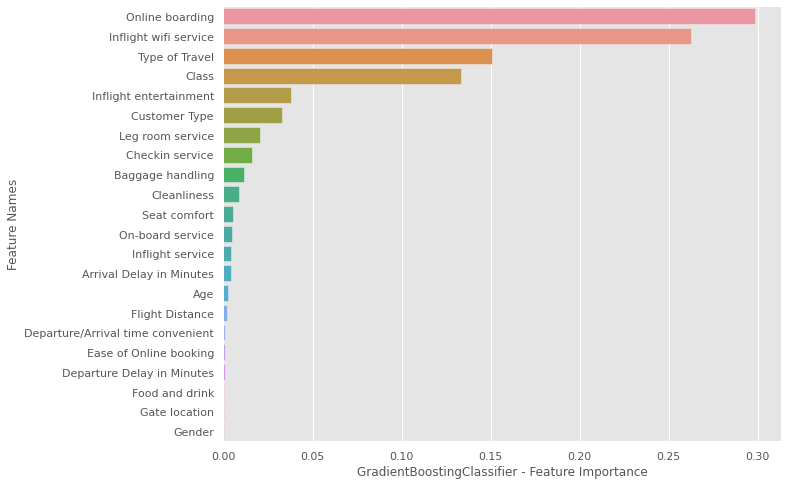

In [203]:
feature_importance = clf_list[-4].feature_importances_
col_name = df_train.iloc[:,:-1].columns
gb_fi ={'feature_names':col_name,'feature_importance':feature_importance}

df_plt = pd.DataFrame(gb_fi)
df_plt.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,8))
sns.barplot(x=df_plt['feature_importance'], y=df_plt['feature_names'])
plt.style.use("ggplot")
plt.xlabel('GradientBoostingClassifier - Feature Importance')
plt.ylabel('Feature Names')
plt.show()

# DNN prediction:

In [204]:
dnn_model = Sequential()
dnn_model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(512, activation='relu'))
dnn_model.add(Dense(1, activation='sigmoid'))

dnn_model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
history = dnn_model.fit(x_train, y_train, epochs=10, batch_size=256,validation_data=(x_test,y_test))

Epoch 1/10
32/32 [==============================] - 2s 37ms/step - loss: 0.4176 - accuracy: 0.8210 - val_loss: 0.3173 - val_accuracy: 0.8655
Epoch 2/10
32/32 [==============================] - 1s 31ms/step - loss: 0.2825 - accuracy: 0.8880 - val_loss: 0.2400 - val_accuracy: 0.9060
Epoch 3/10
32/32 [==============================] - 1s 30ms/step - loss: 0.2198 - accuracy: 0.9116 - val_loss: 0.1998 - val_accuracy: 0.9200
Epoch 4/10
32/32 [==============================] - 1s 31ms/step - loss: 0.1838 - accuracy: 0.9251 - val_loss: 0.1672 - val_accuracy: 0.9330
Epoch 5/10
32/32 [==============================] - 1s 31ms/step - loss: 0.1628 - accuracy: 0.9327 - val_loss: 0.1771 - val_accuracy: 0.9235
Epoch 6/10
32/32 [==============================] - 1s 31ms/step - loss: 0.1566 - accuracy: 0.9362 - val_loss: 0.1497 - val_accuracy: 0.9385
Epoch 7/10
32/32 [==============================] - 1s 31ms/step - loss: 0.1380 - accuracy: 0.9436 - val_loss: 0.1873 - val_accuracy: 0.9190
Epoch 8/10
32

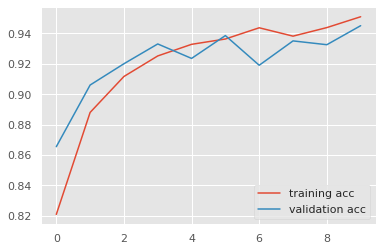

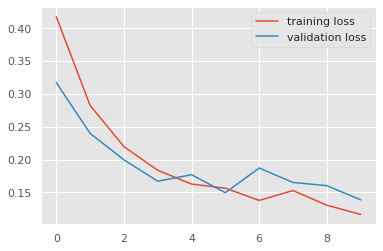

In [205]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, label='training acc')
plt.plot(epochs, val_acc, label='validation acc')
plt.legend()
plt.figure()

plt.plot(epochs, loss, label='training loss')
plt.plot(epochs, val_loss, label='validation loss')
plt.legend()

Biz foydalanadigan modellar:

#KNeighborsClassifier

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


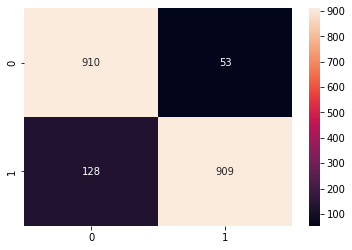

Classification_report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       963
           1       0.94      0.88      0.91      1037

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000


jaccard index: 0.8339449541284404

precision: 0.9449064449064449
recall: 0.8765670202507232
f1_score: 0.9094547273636819

Model aniqligi: 91.0 %


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5) # k-ni qiymati
knn.fit(X_train_prepared, y_train)

# tekshirish (X-test va y_test yordamida)
y_predict = knn.predict(X_test_prepared)


# BAHOLASH:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, jaccard_score, classification_report
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt ='g')
plt.show()

# aniqlik:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
jaccard_index = jaccard_score(y_test, y_predict)
class_report = classification_report(y_test, y_predict)


# chop etish:
print(f"Classification_report:\n{class_report}\n\njaccard index: {jaccard_index}\n\nprecision: {precision}\nrecall: {recall}\nf1_score: {f1}\n\nModel aniqligi: {accuracy*100:.1f} %")

#### Optimal **k** ni topamiz:

`for` tsikli orqali:

In [ ]:
# f1 = []
# for k in range(1,25):
#     knn = KNeighborsClassifier(n_neighbors=k) # k-ni qiymati
#     knn.fit(X_train_prepared, y_train)
#     y_predict = knn.predict(X_test_prepared)
#     f1.append(f1_score(y_test, y_predict))

# plt.figure(figsize=(10,6))
# plt.plot(range(1,25),f1)
# plt.xticks(range(1,25))
# plt.grid()
# plt.show()

#### GridSearchCV orqali

In [ ]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {'n_neighbors': np.arange(1, 25)}

# knn_gscv = GridSearchCV(knn, param_grid, cv=5)

# knn_gscv.fit(X_train, y_train)

# print(knn_gscv.best_params_)

#Logistic Regresssion:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


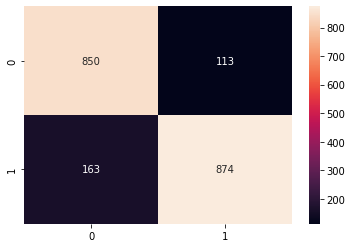

Classification_report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       963
           1       0.89      0.84      0.86      1037

    accuracy                           0.86      2000
   macro avg       0.86      0.86      0.86      2000
weighted avg       0.86      0.86      0.86      2000


jaccard index: 0.76

precision: 0.8855116514690983
recall: 0.8428158148505304
f1_score: 0.8636363636363636

Model aniqligi: 86.2 %


In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()

LR_model.fit(X_train_prepared, y_train)

# tekshirish
y_predict = LR_model.predict(X_test_prepared)

# Baholash
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt ='g')
plt.show()

# aniqlik:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
jaccard_index = jaccard_score(y_test, y_predict)
class_report = classification_report(y_test, y_predict)


# chop etish:
print(f"Classification_report:\n{class_report}\n\njaccard index: {jaccard_index}\n\nprecision: {precision}\nrecall: {recall}\nf1_score: {f1}\n\nModel aniqligi: {accuracy*100:.1f} %")

# Random Forest:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


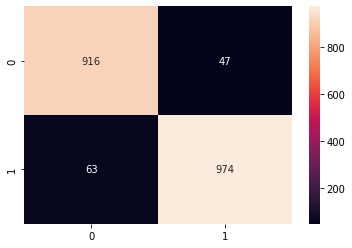

Classification_report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       963
           1       0.95      0.94      0.95      1037

    accuracy                           0.94      2000
   macro avg       0.94      0.95      0.94      2000
weighted avg       0.95      0.94      0.95      2000


jaccard index: 0.8985239852398524

precision: 0.9539666993143977
recall: 0.9392478302796529
f1_score: 0.9465500485908649

Model aniqligi: 94.5 %


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier()
RF_model.fit(X_train_prepared, y_train)

# tekshirish
y_predict = RF_model.predict(X_test_prepared)

# Baholash
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt ='g')
plt.show()

# aniqlik:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
jaccard_index = jaccard_score(y_test, y_predict)
class_report = classification_report(y_test, y_predict)


# chop etish:
print(f"Classification_report:\n{class_report}\n\njaccard index: {jaccard_index}\n\nprecision: {precision}\nrecall: {recall}\nf1_score: {f1}\n\nModel aniqligi: {accuracy*100:.1f} %")

# DecisionTree:

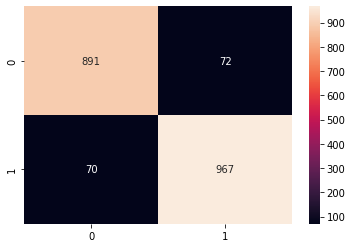

Classification_report:
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       963
           1       0.93      0.93      0.93      1037

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000


jaccard index: 0.8719567177637512

precision: 0.9307025986525506
recall: 0.9324975891996142
f1_score: 0.9315992292870905

Model aniqligi: 92.9 %


In [ ]:
from sklearn.tree import DecisionTreeClassifier
Tree_model = DecisionTreeClassifier()

Tree_model.fit(X_train_prepared, y_train)

# tekshirish
y_predict = Tree_model.predict(X_test_prepared)

# Baholash
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt ='g')
plt.show()

# aniqlik:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
jaccard_index = jaccard_score(y_test, y_predict)
class_report = classification_report(y_test, y_predict)


# chop etish:
print(f"Classification_report:\n{class_report}\n\njaccard index: {jaccard_index}\n\nprecision: {precision}\nrecall: {recall}\nf1_score: {f1}\n\nModel aniqligi: {accuracy*100:.1f} %")

# SVC:

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


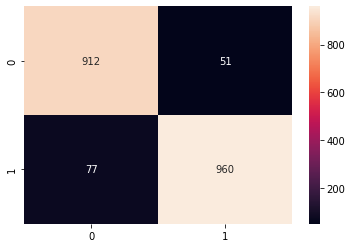

Classification_report:
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       963
           1       0.95      0.93      0.94      1037

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000


jaccard index: 0.8823529411764706

precision: 0.9495548961424333
recall: 0.9257473481195757
f1_score: 0.9375000000000001

Model aniqligi: 93.6 %


In [ ]:
from sklearn.svm import SVC
SVC_model = SVC()

SVC_model.fit(X_train_prepared, y_train)

# tekshirish
y_predict = SVC_model.predict(X_test_prepared)

# Baholash
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt ='g')
plt.show()

# aniqlik:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
jaccard_index = jaccard_score(y_test, y_predict)
class_report = classification_report(y_test, y_predict)


# chop etish:
print(f"Classification_report:\n{class_report}\n\njaccard index: {jaccard_index}\n\nprecision: {precision}\nrecall: {recall}\nf1_score: {f1}\n\nModel aniqligi: {accuracy*100:.1f} %")

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


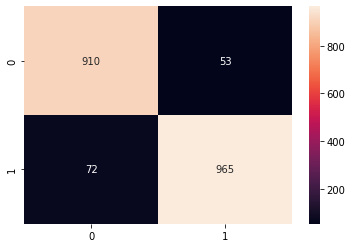

Classification_report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       963
           1       0.95      0.93      0.94      1037

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000


jaccard index: 0.8853211009174312

precision: 0.9479371316306483
recall: 0.9305689488910318
f1_score: 0.9391727493917275

Model aniqligi: 93.8 %


In [ ]:
from xgboost import XGBClassifier
XGBC_model = XGBClassifier()

XGBC_model.fit(X_train_prepared, y_train)

# tekshirish
y_predict = XGBC_model.predict(X_test_prepared)

# Baholash
sns.heatmap(confusion_matrix(y_test, y_predict), annot=True, fmt ='g')
plt.show()

# aniqlik:
precision = precision_score(y_test, y_predict)
recall = recall_score(y_test, y_predict)
f1 = f1_score(y_test, y_predict)
accuracy = accuracy_score(y_test, y_predict)
jaccard_index = jaccard_score(y_test, y_predict)
class_report = classification_report(y_test, y_predict)


# chop etish:
print(f"Classification_report:\n{class_report}\n\njaccard index: {jaccard_index}\n\nprecision: {precision}\nrecall: {recall}\nf1_score: {f1}\n\nModel aniqligi: {accuracy*100:.1f} %")

#### Bu dataset uchun eng yaxshi ko'rsatgich `RandomForest` modelda ekan.

## 🔎Bizga qo'yilgan vazifaga o'tamiz. df_test uchun  `satisfaction` ni bashorat qilamiz:

In [ ]:
df_test.head(3)

,gender,CustType,age,traveltype,Class,FlightDis,wifiservis,DepArrTime,EObook,gateloc,...,SeatCom,Inflenter,oneboard,LegRoom,BagHand,Checkser,InflSer,CleanLiness,DepDelayMin,ArrDelayMin
id,,,,,,,,,,,,,,,,,,,,,
1,0,1,25,0,0,2704,2,2,2,3,...,5,2,4,4,3,5,1,5,152,191.0
2,0,1,49,1,2,1623,1,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
3,1,1,51,1,2,338,4,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0


In [ ]:
df_test_prepared = pipeline.fit_transform(df_test)

In [ ]:
y_predict_test = RF_model.predict(df_test_prepared)
y_predict_test

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
y_predict_test

array([0, 1, 1, ..., 0, 1, 0])

In [ ]:
ss_df.satisfaction = y_predict_test
ss_df

,satisfaction
id,
1,0
2,1
3,1
4,1
5,0
...,...
3996,1
3997,0
3998,0


In [ ]:
ss_df.to_csv('submission_data_09.csv')